In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import KFold, train_test_split
from math import sqrt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../Cleaned Data/cleaned_Data.csv')
X = dataset[['PrevAVGCost', 'PrevAssignedCost', 'AVGCost', 'LatestDateCost', 'A', 'B', 'C', 'D', 'E', 'F', 'G']]
y = dataset['GenPrice']

In [3]:
X

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G
0,27.919192,33.0,28.545455,20.535354,1,0,0,0,0,0,0
1,57.333333,63.0,56.121212,61.838384,1,0,0,0,0,0,0
2,50.777778,54.0,45.131313,50.000000,1,0,0,0,0,0,0
3,45.747475,56.0,40.525253,38.080808,0,1,0,0,0,0,0
4,45.747475,56.0,40.525253,38.080808,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
24621,0.000000,60.0,0.000000,0.000000,0,0,0,0,0,0,1
24622,80.808081,96.0,0.000000,0.000000,0,0,0,0,0,0,1
24623,0.000000,23.0,25.131313,25.131313,0,0,0,0,0,0,1
24624,151.515152,201.0,181.818182,181.818182,0,0,0,0,0,0,1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes = (200, 200, 200, 200, 200), activation = 'relu', solver = 'adam', max_iter = 500, learning_rate = 'adaptive')
regressor.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(200, 200, 200, 200, 200),
             learning_rate='adaptive', max_iter=500)

In [6]:
trainSet = pd.concat([X_train, y_train], axis = 1)
trainSet.head()

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
17651,12.049180,30.0,18.196721,22.967213,1,0,0,0,0,0,0,42.0
22606,124.793814,130.0,0.000000,0.000000,0,0,1,0,0,0,0,169.0
14124,28.343434,29.0,32.959596,40.949495,0,0,1,0,0,0,0,60.0
5777,21.506024,24.0,22.963855,29.000000,1,0,0,0,0,0,0,36.0
15500,12.557895,13.0,14.452632,16.463158,1,0,0,0,0,0,0,25.0


In [7]:
y_pred = regressor.predict(X_test)
y_pred

array([ 28.99554566, 103.66611074,  84.33225978, ...,  95.080246  ,
        26.78161853,  38.87897844])

In [8]:
testSet = pd.concat([X_test, y_test], axis = 1)
testSet.head()

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
12301,18.919192,20.0,17.707071,17.757576,1,0,0,0,0,0,0,27.0
13317,62.808081,67.0,73.484848,74.656566,1,0,0,0,0,0,0,105.0
12320,0.000000,61.0,0.000000,0.000000,1,0,0,0,0,0,0,88.0
4013,107.747475,110.0,80.808081,80.808081,0,0,0,0,0,0,1,142.0
7807,40.606061,50.0,61.505051,66.222222,0,0,1,0,0,0,0,99.0


In [9]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(y_pred, name = 'PredictedGenPrice')], axis = 1).round(2)
datasetPredict.head(10)

,index,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice,PredictedGenPrice
0,12301,18.92,20.0,17.71,17.76,1,0,0,0,0,0,0,27.0,29.00
1,13317,62.81,67.0,73.48,74.66,1,0,0,0,0,0,0,105.0,103.67
2,12320,0.00,61.0,0.00,0.00,1,0,0,0,0,0,0,88.0,84.33
3,4013,107.75,110.0,80.81,80.81,0,0,0,0,0,0,1,142.0,123.66
4,7807,40.61,50.0,61.51,66.22,0,0,1,0,0,0,0,99.0,96.71
5,439,0.00,13.0,0.00,0.00,0,0,1,0,0,0,0,33.0,30.59
6,9995,33.55,33.0,33.18,33.94,0,0,0,0,0,0,1,54.0,50.85
7,14270,48.82,84.0,50.51,50.51,1,0,0,0,0,0,0,117.0,95.74
8,11358,15.15,15.0,15.15,15.15,0,0,1,0,0,0,0,30.0,30.52
9,8320,22.69,25.0,22.88,22.47,0,0,0,0,0,0,1,52.0,37.20


In [10]:
datasetPredict.corr()

,index,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice,PredictedGenPrice
index,1.000000,-0.005980,0.003228,-0.004309,0.006373,-0.018983,-0.007056,0.006269,0.018399,0.012576,0.002493,0.012633,0.007801,0.005075
PrevAVGCost,-0.005980,1.000000,0.525551,0.784302,0.764423,-0.059053,0.124087,0.148206,-0.056017,-0.079911,0.080937,-0.101463,0.494235,0.489631
PrevAssignedCost,0.003228,0.525551,1.000000,0.524154,0.462267,-0.117272,0.105027,0.170726,-0.068318,-0.094067,0.037458,-0.028785,0.981192,0.988209
AVGCost,-0.004309,0.784302,0.524154,1.000000,0.878765,-0.055066,0.126399,0.132833,-0.054911,-0.079057,0.076166,-0.094352,0.529382,0.538413
LatestDateCost,0.006373,0.764423,0.462267,0.878765,1.000000,-0.050260,0.149702,0.146129,-0.053841,-0.079573,0.085198,-0.125042,0.473442,0.465360
A,-0.018983,-0.059053,-0.117272,-0.055066,-0.050260,1.000000,-0.254609,-0.424238,-0.097037,-0.119567,-0.077771,-0.593428,-0.130243,-0.129148
B,-0.007056,0.124087,0.105027,0.126399,0.149702,-0.254609,1.000000,-0.105758,-0.024190,-0.029807,-0.019388,-0.147936,0.099396,0.101200
C,0.006269,0.148206,0.170726,0.132833,0.146129,-0.424238,-0.105758,1.000000,-0.040307,-0.049665,-0.032304,-0.246495,0.195184,0.192514
D,0.018399,-0.056017,-0.068318,-0.054911,-0.053841,-0.097037,-0.024190,-0.040307,1.000000,-0.011360,-0.007389,-0.056381,-0.073099,-0.072484
E,0.012576,-0.079911,-0.094067,-0.079057,-0.079573,-0.119567,-0.029807,-0.049665,-0.011360,1.000000,-0.009105,-0.069472,-0.101863,-0.101326


In [11]:
print("Training set accuracy = " + str(regressor.score(X_train, y_train)))
print("Test set accuracy = " + str(regressor.score(X_test, y_test)))

Training set accuracy = 0.9890173953611711
Test set accuracy = 0.9822983396090369


In [12]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 179.2678767527064


In [13]:
def mean_absolute_percentage_error(y_test, y_pred):
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((y_test - y_pred)/y_test)) * 100

print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAPE: 6.288047515809363


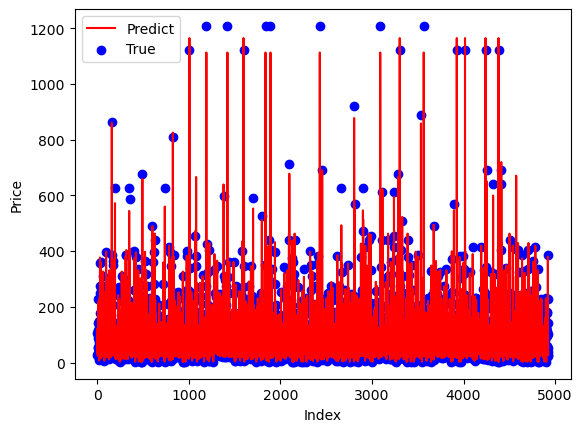

In [14]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(y_pred))], y_pred, color = 'r')
plt.scatter([i for i in range(len(y_pred))], y_test, color = 'b')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend(['Predict', 'True'], loc = 'best')
plt.show()

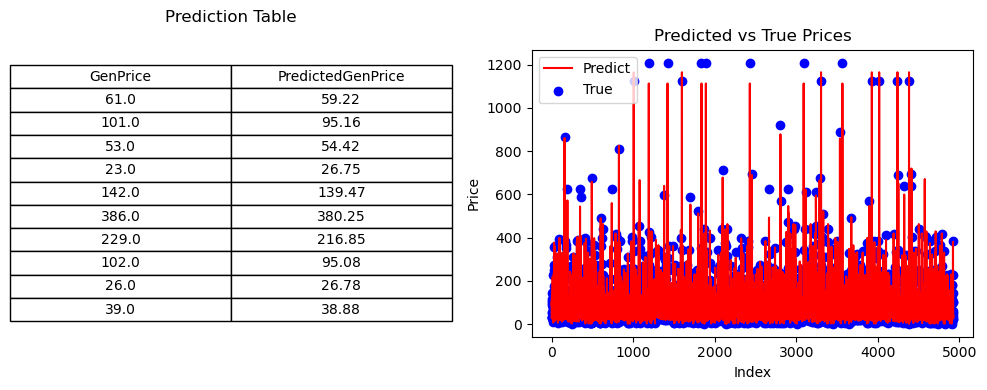

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df_to_plot = datasetPredict.loc[:, ['GenPrice', 'PredictedGenPrice']].tail(10)


fig, axs = plt.subplots(1, 2, figsize=(10, 4)) 


axs[0].axis('off')
table = axs[0].table(cellText=df_to_plot.values,
                     colLabels=df_to_plot.columns,
                     loc='center',
                     cellLoc='center')
table.scale(1, 1.5)
axs[0].set_title("Prediction Table", pad=20)


axs[1].plot([i for i in range(len(y_pred))], y_pred, color='r')
axs[1].scatter([i for i in range(len(y_test))], y_test, color='b')
axs[1].set_ylabel('Price')
axs[1].set_xlabel('Index')
axs[1].legend(['Predict', 'True'], loc='best')
axs[1].set_title("Predicted vs True Prices")


plt.tight_layout()
plt.savefig("Feedforward_neural_network_results.png", dpi=300)
plt.show()

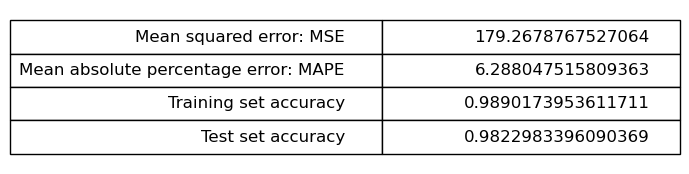

In [17]:
import matplotlib.pyplot as plt


metrics_data = [
    ["Mean squared error: MSE", 179.2678767527064],
    ["Mean absolute percentage error: MAPE", 6.288047515809363],
    ["Training set accuracy", 0.9890173953611711],
    ["Test set accuracy", 0.9822983396090369]
]


fig, ax = plt.subplots(figsize=(8, 2)) 
ax.axis('off') 


table = ax.table(cellText=metrics_data, colWidths=[0.5, 0.4], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2) 



plt.savefig("model_metrics(Feedforward_neural_network).png", bbox_inches='tight', dpi=300)
plt.show()

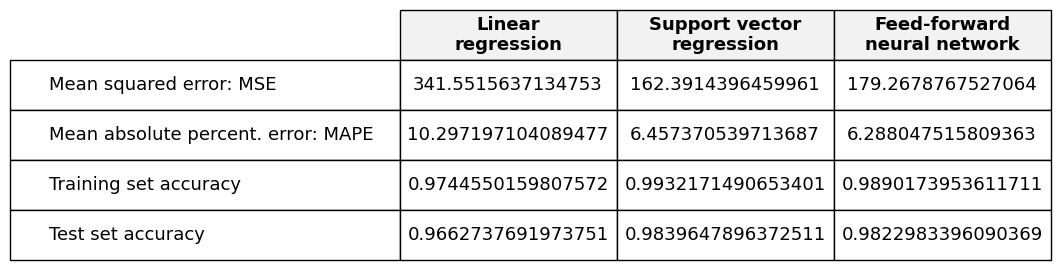

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Your original data
data = {
    'Linear\nregression': [
        341.5515637134753,
        10.297197104089478,
        0.9744550159807572,
        0.9662737691973751
    ],
    'Support vector\nregression': [
        162.3914396459961,
        6.457370539713687,
        0.9932171490653401,
        0.9839647896372511
    ],
    'Feed-forward\nneural network': [
        179.2678767527064,
        6.288047515809363,
        0.9890173953611711,
        0.9822983396090369
    ]
}

# Row labels
index_labels = [
    'Mean squared error: MSE',
    'Mean absolute percent. error: MAPE',
    'Training set accuracy',
    'Test set accuracy'
]

# Create DataFrame
df = pd.DataFrame(data, index=index_labels)

# Create figure with a good ratio for clarity
fig, ax = plt.subplots(figsize=(6, 2.8))
ax.axis('off')

# Create the table
tbl = ax.table(
    cellText=df.values,
    rowLabels=df.index,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Style for clarity
tbl.auto_set_font_size(False)
tbl.set_fontsize(13)
tbl.scale(1.4, 3)

# Bold header row & light background
for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#f2f2f2')

# Save high resolution PNG
plt.savefig("model_comparison_final.png", bbox_inches='tight', dpi=400)
plt.show()
